In [174]:
import pandas as pd
import json
from collections import defaultdict

# Load the Excel file
df = pd.read_excel("/home/dayita/code/wikipedia-bias-2/survey_check/ethics-course-project/data/india/2022/2022_india.xlsx") 

# Create mapping from col1 to col2
mapping = defaultdict(set)
for _, row in df.iterrows():
    key = str(row['G_TOWNSIZE2: Settlement size_5 groups']).strip().lower()
    value = str(row['H_URBRURAL: Urban-Rural']).strip().lower()
    mapping[key].add(value)

# Convert sets to lists for JSON serialization
mapping_json = {k: list(v) for k, v in mapping.items()}

# Save mapping as JSON
with open("region_mapping.json", "w") as f:
    json.dump(mapping_json, f, indent=4)

print("Mapping saved to region_mapping.json")


/home/dayita/code/wikipedia-bias-2/env/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


Mapping saved to region_mapping.json


In [1]:
from scoring import analyze_survey_alignment, compute_similarity_per_theme

# 1. Temporal Similarity

### Indian States
Indian States of West Bengal, Telengana/Andhra Pradesh, Maharashtra, Uttar Pradesh, Bihar are considered for this analysis

In [2]:
import pandas as pd

total_results = {}

for year in ['2022', '2012', '2006']:
    print(f"\n--- Year: {year} ---")
    results = analyze_survey_alignment(mode='country', year=year, country='india', region_wise=True, verbose=False)
    final_table = pd.DataFrame.from_dict(results, orient='index')
    final_table.index.name = 'Region'
    final_table.reset_index(inplace=True)
    final_table['State'] = final_table['Region'].apply(lambda x: x.split()[0].split('-')[1].capitalize())
    final_table = final_table[['State', 'Region', 'soft_metric', 'hard_metric']]
    print(final_table)
    total_results[year] = final_table


--- Year: 2022 ---
  State               Region  soft_metric  hard_metric
0    Br          in-br bihar     0.629619     0.247892
1    Dl          in-dl delhi     0.598989     0.206934
2    Hr        in-hr haryana     0.626940     0.242063
3    Mh    in-mh maharashtra     0.606802     0.192385
4    Pb         in-pb punjab     0.599901     0.198813
5    Tg      in-tg telangana     0.665371     0.252600
6    Up  in-up uttar pradesh     0.608324     0.207650
7    Wb    in-wb west bengal     0.634429     0.221328

--- Year: 2012 ---
  State               Region  soft_metric  hard_metric
0    Tg      in-tg telangana     0.678863     0.260485
1    Br          in-br bihar     0.644394     0.268802
2    Dl          in-dl delhi     0.658408     0.234421
3    Hr        in-hr haryana     0.555752     0.211765
4    Mh    in-mh maharashtra     0.643530     0.225455
5    Up  in-up uttar pradesh     0.620633     0.225905
6    Wb    in-wb west bengal     0.644486     0.269231

--- Year: 2006 ---
  Sta

In [2]:
import pandas as pd

total_results = {}

for year in ['2022', '2012', '2006']:
    print(f"\n--- Year: {year} ---")
    results = analyze_survey_alignment(mode='country', year=year, country='india', region_wise=True, verbose=False, model="gemma")
    final_table = pd.DataFrame.from_dict(results, orient='index')
    final_table.index.name = 'Region'
    final_table.reset_index(inplace=True)
    final_table['State'] = final_table['Region'].apply(lambda x: x.split()[0].split('-')[1].capitalize())
    final_table = final_table[['State', 'Region', 'soft_metric', 'hard_metric']]
    print(final_table)
    total_results[year] = final_table


--- Year: 2022 ---
  State               Region  soft_metric  hard_metric
0    Br          in-br bihar     0.640097     0.282462
1    Dl          in-dl delhi     0.677164     0.364030
2    Hr        in-hr haryana     0.650551     0.317460
3    Mh    in-mh maharashtra     0.596114     0.296593
4    Pb         in-pb punjab     0.678816     0.332344
5    Tg      in-tg telangana     0.671702     0.312036
6    Up  in-up uttar pradesh     0.655456     0.329856
7    Wb    in-wb west bengal     0.655924     0.334004

--- Year: 2012 ---
  State               Region  soft_metric  hard_metric
0    Tg      in-tg telangana     0.726855     0.412844
1    Br          in-br bihar     0.698501     0.365367
2    Dl          in-dl delhi     0.701863     0.264095
3    Hr        in-hr haryana     0.647974     0.364706
4    Mh    in-mh maharashtra     0.660152     0.333636
5    Up  in-up uttar pradesh     0.655218     0.313998
6    Wb    in-wb west bengal     0.662845     0.340237

--- Year: 2006 ---
  Sta

/tmp/ipykernel_527392/2739336116.py:24: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  ax = sns.barplot(data=final_table, x='State', y='soft_metric', hue='Year', palette=palette)


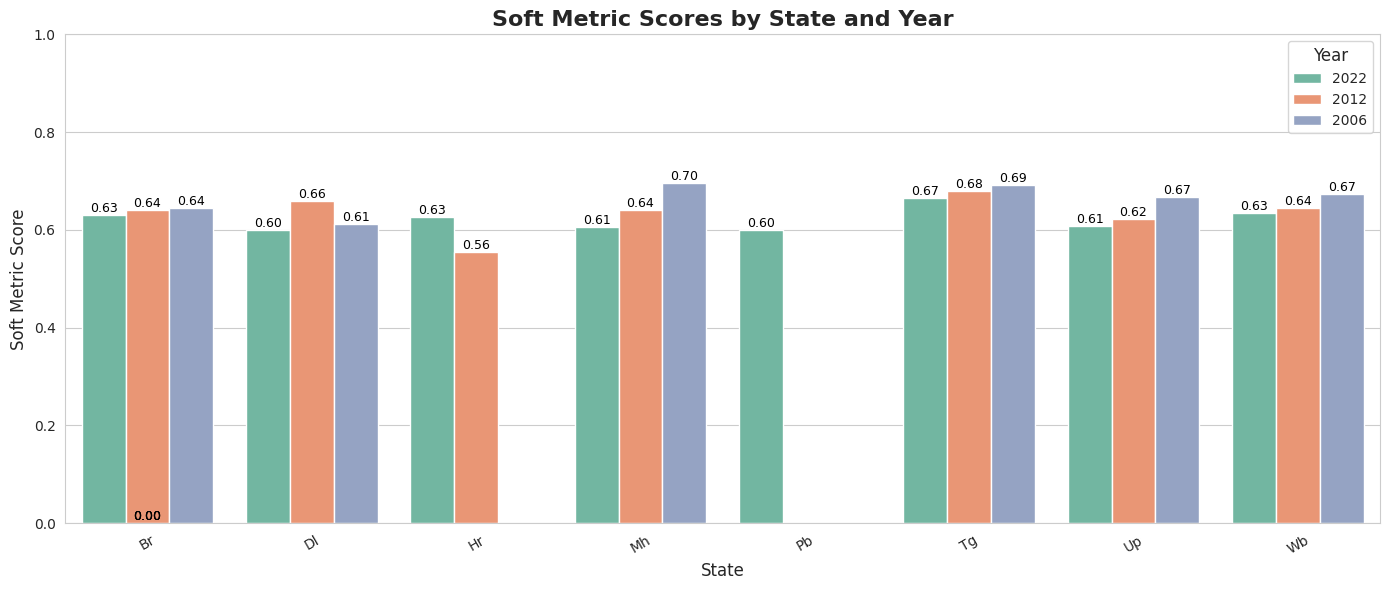

/tmp/ipykernel_527392/2739336116.py:37: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  ax = sns.barplot(data=final_table, x='State', y='hard_metric', hue='Year', palette=palette)


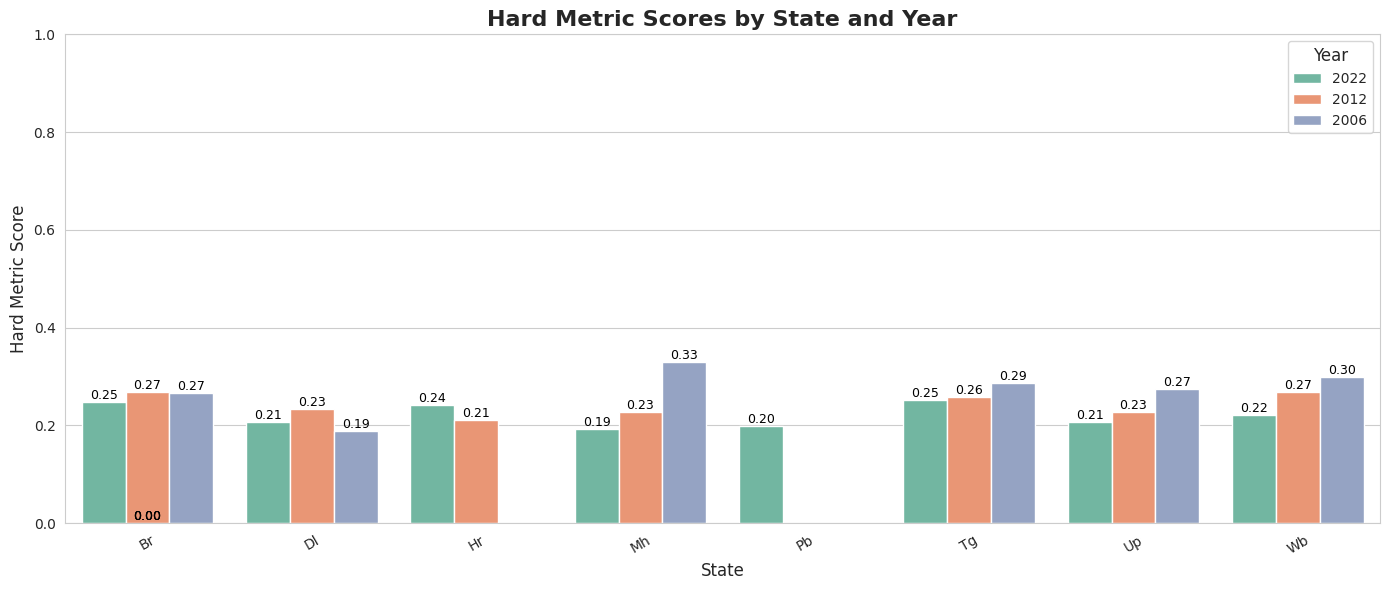

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style and palette
sns.set_style("whitegrid")
palette = sns.color_palette("Set2")

# Concatenate all years
final_table = pd.concat([df.assign(Year=year) for year, df in total_results.items()], ignore_index=True)

# Function to annotate bars
def annotate_bars(ax, fmt="{:.2f}"):
    for p in ax.patches:
        height = p.get_height()
        if not np.isnan(height):
            ax.annotate(fmt.format(height),
                        (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=9, color='black')

# Plot Soft Metrics
plt.figure(figsize=(14,6))
ax = sns.barplot(data=final_table, x='State', y='soft_metric', hue='Year', palette=palette)
plt.title('Soft Metric Scores by State and Year', fontsize=16, weight='bold')
plt.ylabel('Soft Metric Score', fontsize=12)
plt.xlabel('State', fontsize=12)
plt.xticks(rotation=30)
plt.ylim(0, 1)
plt.legend(title='Year', fontsize=10, title_fontsize=12)
annotate_bars(ax)
plt.tight_layout()
plt.show()

# Plot Hard Metrics
plt.figure(figsize=(14,6))
ax = sns.barplot(data=final_table, x='State', y='hard_metric', hue='Year', palette=palette)
plt.title('Hard Metric Scores by State and Year', fontsize=16, weight='bold')
plt.ylabel('Hard Metric Score', fontsize=12)
plt.xlabel('State', fontsize=12)
plt.xticks(rotation=30)
plt.ylim(0, 1)
plt.legend(title='Year', fontsize=10, title_fontsize=12)
annotate_bars(ax)
plt.tight_layout()
plt.show()

### Countries
Russia, USA, Japan and India are considered for this analysis

In [2]:
import pandas as pd
import numpy as np
from collections import defaultdict

countries = ['japan', 'US', 'india', 'russia']

print("\n--- Year: 2022 ---")

all_results_countries = defaultdict(list)
for country in countries:
    results = analyze_survey_alignment(country=country, mode='country', year='2022', region_wise=False, verbose=False)
    combined = {
        'Country': country,
        'soft_metric': results.get('soft_metric'),
        'hard_metric': results.get('hard_metric')
    }
    all_results_countries['2022'].append(combined)
final_table = pd.DataFrame(all_results_countries['2022'], columns=['Country', 'soft_metric', 'hard_metric'])
print(final_table)

print("\n--- Year: 2012 ---")
for country in countries:
    results = analyze_survey_alignment(country=country, mode='country', year='2012', region_wise=False, verbose=False)
    combined = {
        'Country': country,
        'soft_metric': results.get('soft_metric'),
        'hard_metric': results.get('hard_metric')
    }
    all_results_countries['2012'].append(combined)
final_table = pd.DataFrame(all_results_countries['2012'], columns=['Country', 'soft_metric', 'hard_metric'])
print(final_table)

print("\n--- Year: 2006 ---")
for country in countries:
    results = analyze_survey_alignment(country=country, mode='country', year='2006', region_wise=False, verbose=False)
    combined = {
        'Country': country,
        'soft_metric': results.get('soft_metric'),
        'hard_metric': results.get('hard_metric')
    }
    all_results_countries['2006'].append(combined)

final_table = pd.DataFrame(all_results_countries['2006'], columns=['Country', 'soft_metric', 'hard_metric'])
print(final_table)


--- Year: 2022 ---
  Country  soft_metric  hard_metric
0   japan     0.713568     0.345615
1      US     0.684116     0.312857
2   india     0.619154     0.220533
3  russia     0.673729     0.296647

--- Year: 2012 ---


/home/dayita/code/wikipedia-bias-2/survey_check/ethics-course-project/evaluation/scoring.py:314: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  wvs_df['urban_rural'] = [['urban', 'rural']] * len(wvs_df)


  Country  soft_metric  hard_metric
0   japan     0.710315     0.306583
1      US     0.674359     0.317235
2   india     0.637318     0.242193
3  russia     0.681216     0.300565

--- Year: 2006 ---
  Country  soft_metric  hard_metric
0   japan     0.717019     0.266968
1      US     0.684715     0.312831
2   india     0.663034     0.271043
3  russia     0.649460     0.278689


In [ ]:
import pandas as pd
import numpy as np
from collections import defaultdict

countries = ['japan', 'US', 'india', 'russia']

print("\n--- Year: 2022 ---")

all_results_countries = defaultdict(list)
for country in countries:
    results = analyze_survey_alignment(country=country, mode='country', year='2022', model='gemma', region_wise=False, verbose=False)
    combined = {
        'Country': country,
        'soft_metric': results.get('soft_metric'),
        'hard_metric': results.get('hard_metric')
    }
    all_results_countries['2022'].append(combined)
final_table = pd.DataFrame(all_results_countries['2022'], columns=['Country', 'soft_metric', 'hard_metric'])
print(final_table)

print("\n--- Year: 2012 ---")
for country in countries:
    results = analyze_survey_alignment(country=country, mode='country', year='2012', model='gemma', region_wise=False, verbose=False)
    combined = {
        'Country': country,
        'soft_metric': results.get('soft_metric'),
        'hard_metric': results.get('hard_metric')
    }
    all_results_countries['2012'].append(combined)
final_table = pd.DataFrame(all_results_countries['2012'], columns=['Country', 'soft_metric', 'hard_metric'])
print(final_table)

print("\n--- Year: 2006 ---")
for country in countries:
    results = analyze_survey_alignment(country=country, mode='country', year='2006', model='gemma', region_wise=False, verbose=False)
    combined = {
        'Country': country,
        'soft_metric': results.get('soft_metric'),
        'hard_metric': results.get('hard_metric')
    }
    all_results_countries['2006'].append(combined)

final_table = pd.DataFrame(all_results_countries['2006'], columns=['Country', 'soft_metric', 'hard_metric'])
print(final_table)


--- Year: 2022 ---
  Country  soft_metric  hard_metric
0   japan     0.776615     0.426676
1      US     0.784094     0.478719
2   india     0.653891     0.321473
3  russia     0.699660     0.360947

--- Year: 2012 ---


/home/dayita/code/wikipedia-bias-2/survey_check/ethics-course-project/evaluation/scoring.py:316: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  wvs_df['urban_rural'] = [['urban', 'rural']] * len(wvs_df)


  Country  soft_metric  hard_metric
0   japan     0.787161     0.413886
1      US     0.744696     0.424457
2   india     0.677091     0.341914
3  russia     0.711485     0.347723

--- Year: 2006 ---


# 2. Theme Similarity

### Indian States
Indian States of West Bengal, Telangana/Andhra Pradesh, Maharashtra, Uttar Pradesh, Bihar are considered for this analysis

In [ ]:
import pandas as pd
import numpy as np

states = ['bengal', 'telangana', 'maharashtra', 'bihar', 'delhi', 'up']
years = ['2022', '2012', '2006']

for year in years:
    print(f"\n--- Year: {year} ---")
    for state in states:
        print(f"\nFor the state: {state}")
        results = compute_similarity_per_theme(state=state, year=year)
        for theme, score in results['per_theme'].items():
            if 'per_theme' in results and score is not np.nan and results['per_theme_counts'][theme] > 1:
                print(f"{theme}: {score:.3f}, No. of questions: {results['per_theme_counts'][theme]}")

/tmp/ipykernel_1275962/3738105929.py:46: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab10')


No overlapping data after merge.
No overlapping data after merge.
No overlapping data after merge.
No overlapping data after merge.
No overlapping data after merge.
No overlapping data after merge.
No overlapping data after merge.
No overlapping data after merge.
No overlapping data after merge.
No overlapping data after merge.
No overlapping data after merge.
No overlapping data after merge.
No overlapping data after merge.
No overlapping data after merge.
No overlapping data after merge.
No overlapping data after merge.
No overlapping data after merge.
No overlapping data after merge.
No overlapping data after merge.
No overlapping data after merge.
No overlapping data after merge.
No overlapping data after merge.
No overlapping data after merge.


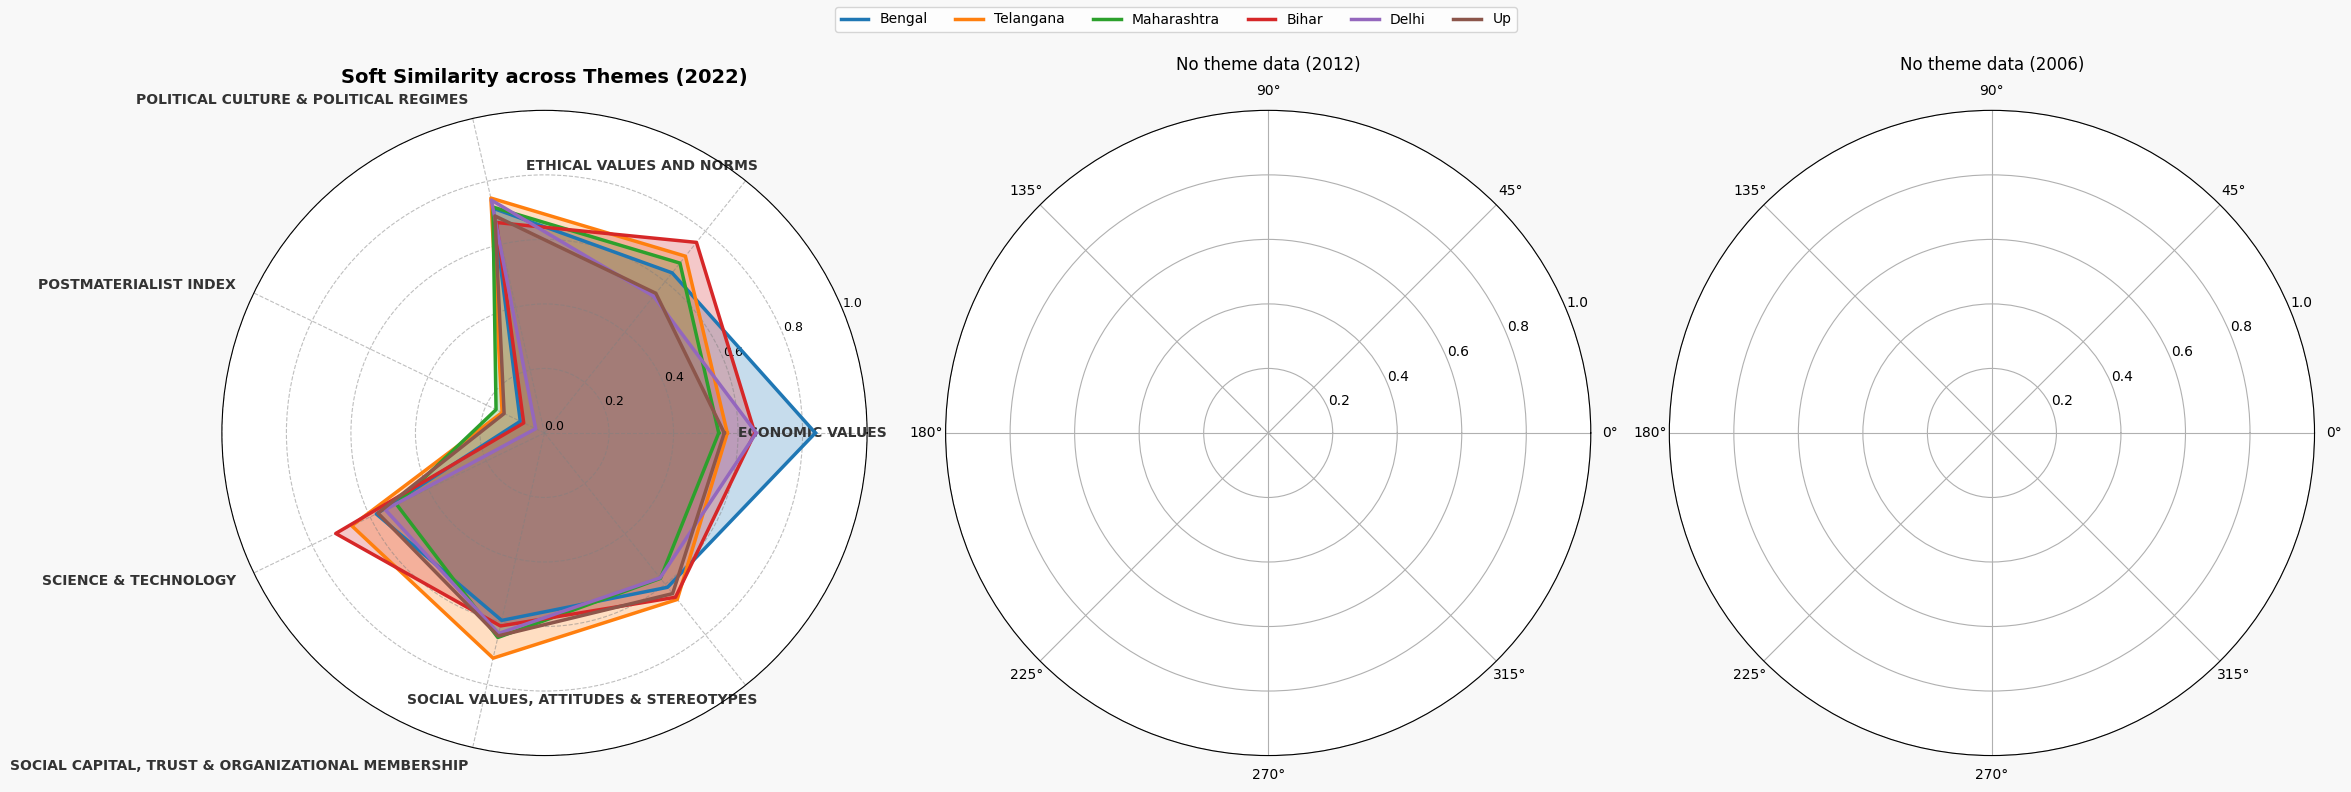

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

years = ['2022', '2012', '2006']
states = ['bengal', 'telangana', 'maharashtra', 'bihar', 'delhi', 'up']

# Prepare the figure and axes for 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(24, 8), subplot_kw=dict(polar=True))
fig.patch.set_facecolor('#f8f8f8')  # Light background

# Iterate over years and plot each year's data
for i, year in enumerate(years):
    ax = axes[i]
    all_theme_scores = {}  # Reset theme scores for each year

    # Collect per-theme scores for all states
    for state in states:
        results = compute_similarity_per_theme(state=state, year=year)
        if not results:
            # no merged data for this state/year
            continue
        # only keep themes with numeric scores and sufficient question count
        theme_results = {}
        for theme, score in results['per_theme'].items():
            cnt = results['per_theme_counts'].get(theme, 0)
            if isinstance(score, float) and not np.isnan(score) and cnt > 1:
                theme_results[theme] = score
        if theme_results:
            all_theme_scores[state] = theme_results

    # Get all unique themes
    themes = sorted({theme for scores in all_theme_scores.values() for theme in scores.keys()})

    # If no themes available for this year, skip plotting and set title
    if not themes:
        ax.set_title(f"No theme data ({year})", size=12, pad=10)
        continue

    # Prepare angles
    num_vars = len(themes)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]

    # Choose a colormap and build list of colors
    cmap = cm.get_cmap('tab10')
    colors = [cmap(i) for i in range(len(states))]

    # Plot each state
    for idx, (state, scores) in enumerate(all_theme_scores.items()):
        values = [scores.get(theme, 0.0) for theme in themes]
        values += values[:1]
        color = colors[idx % len(colors)]
        ax.plot(angles, values, linewidth=2.5, color=color, label=state.capitalize())
        ax.fill(angles, values, color=color, alpha=0.25)

    # Set theme labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(themes, fontsize=10, fontweight='bold', color='#333333')

    # Rotate labels for readability (ensure matching lengths)
    for label, angle in zip(ax.get_xticklabels(), angles[:-1]):
        label.set_rotation(np.degrees(angle))
        label.set_horizontalalignment('right')

    # Set y-labels and range
    ax.set_yticks(np.linspace(0, 1, 6))
    ax.set_yticklabels([f"{x:.1f}" for x in np.linspace(0, 1, 6)], fontsize=9)
    ax.set_ylim(0, 1)

    # Grid style
    ax.yaxis.grid(True, color='gray', linestyle='dashed', alpha=0.5)
    ax.xaxis.grid(True, color='gray', linestyle='dashed', alpha=0.5)

    # Title for each subplot
    ax.set_title(f"Soft Similarity across Themes ({year})", size=14, pad=20, weight='bold')

# Add a single legend for all subplots
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=len(states), fontsize=10, frameon=True)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

/tmp/ipykernel_527392/3533968115.py:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab10', len(states))


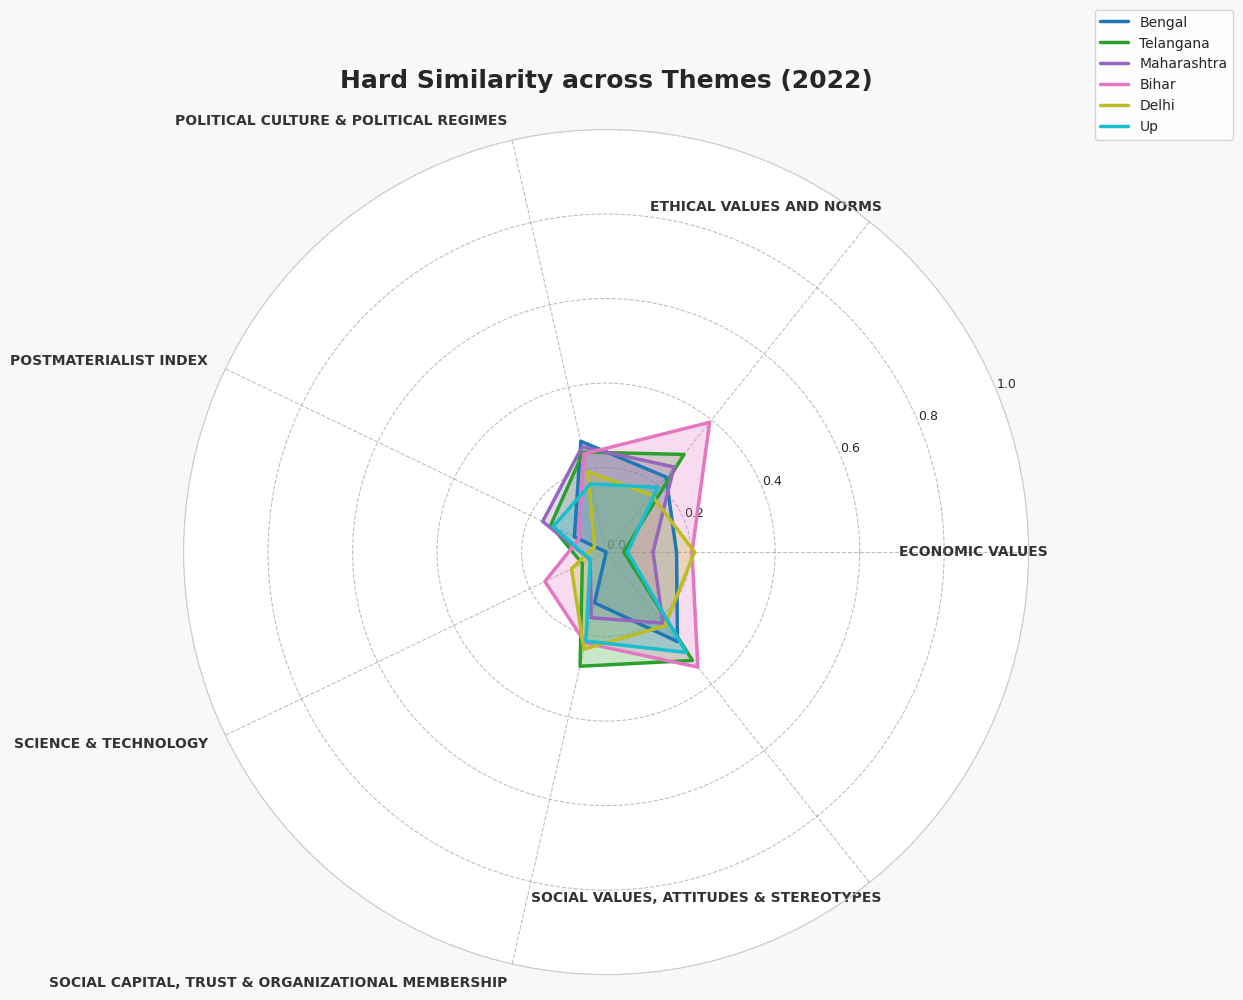

In [221]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

states = ['bengal', 'telangana', 'maharashtra', 'bihar', 'delhi', 'up']
all_theme_scores = {}

# Collect per-theme scores for all states
for state in states:
    results = compute_similarity_per_theme(state=state, metric_type='hard')
    theme_results = {theme: score for theme, score in results['per_theme'].items()
                     if score is not np.nan and results['per_theme_counts'][theme] > 1}
    all_theme_scores[state] = theme_results

# Get all unique themes
themes = sorted({theme for scores in all_theme_scores.values() for theme in scores.keys()})

# Prepare angles
num_vars = len(themes)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

# Initialize polar subplot
fig, ax = plt.subplots(figsize=(12, 10), subplot_kw=dict(polar=True))
fig.patch.set_facecolor('#f8f8f8') 

# Choose a colormap
colors = cm.get_cmap('tab10', len(states))

# Plot each state
for idx, (state, scores) in enumerate(all_theme_scores.items()):
    values = [scores.get(theme, 0) for theme in themes]
    values += values[:1]
    ax.plot(angles, values, linewidth=2.5, color=colors(idx), label=state.capitalize())
    ax.fill(angles, values, color=colors(idx), alpha=0.25)

# Set theme labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(themes, fontsize=10, fontweight='bold', color='#333333')

# Rotate labels for readability
for label, angle in zip(ax.get_xticklabels(), angles):
    label.set_rotation(np.degrees(angle))
    label.set_horizontalalignment('right')

# Set y-labels and range
ax.set_yticks(np.linspace(0, 1, 6))
ax.set_yticklabels([f"{x:.1f}" for x in np.linspace(0, 1, 6)], fontsize=9)
ax.set_ylim(0, 1)

# Grid style
ax.yaxis.grid(True, color='gray', linestyle='dashed', alpha=0.5)
ax.xaxis.grid(True, color='gray', linestyle='dashed', alpha=0.5)

# Title and legend
plt.title("Hard Similarity across Themes (2022)", size=18, pad=30, weight='bold')
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1.15), fontsize=10, frameon=True)

plt.tight_layout()
plt.show()

### Countries

In [7]:
countries = ['india', 'japan', 'US', 'russia']
for cnt in countries:
    print(f"\nFor the country: {cnt}")
    results = compute_similarity_per_theme(country=cnt, mode='country')
    for theme, score in results['per_theme'].items():
        if score is not np.nan and results['per_theme_counts'][theme] > 1:
            print(f"{theme}: {score:.3f}, No. of questions: {results['per_theme_counts'][theme]}")


For the country: india
SOCIAL VALUES, ATTITUDES & STEREOTYPES: 0.624, No. of questions: 24
SOCIAL CAPITAL, TRUST & ORGANIZATIONAL MEMBERSHIP: 0.640, No. of questions: 23
ECONOMIC VALUES: 0.617, No. of questions: 6
POSTMATERIALIST INDEX: 0.126, No. of questions: 6
SCIENCE & TECHNOLOGY: 0.601, No. of questions: 4
ETHICAL VALUES AND NORMS: 0.642, No. of questions: 11
POLITICAL CULTURE & POLITICAL REGIMES: 0.712, No. of questions: 15

For the country: japan
SOCIAL VALUES, ATTITUDES & STEREOTYPES: 0.688, No. of questions: 24
SOCIAL CAPITAL, TRUST & ORGANIZATIONAL MEMBERSHIP: 0.758, No. of questions: 22
ECONOMIC VALUES: 0.684, No. of questions: 6
POSTMATERIALIST INDEX: 0.104, No. of questions: 3
SCIENCE & TECHNOLOGY: 0.755, No. of questions: 4
ETHICAL VALUES AND NORMS: 0.665, No. of questions: 10
POLITICAL CULTURE & POLITICAL REGIMES: 0.759, No. of questions: 15

For the country: US
SOCIAL VALUES, ATTITUDES & STEREOTYPES: 0.718, No. of questions: 24
SOCIAL CAPITAL, TRUST & ORGANIZATIONAL ME

KeyError: 'per_theme'

Selected questions (present in both): ['Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q18', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q29', 'Q30', 'Q31', 'Q32', 'Q33', 'Q34', 'Q43', 'Q44', 'Q45', 'Q58', 'Q59', 'Q60', 'Q61', 'Q62', 'Q63', 'Q64', 'Q65', 'Q66', 'Q67', 'Q68', 'Q69', 'Q70', 'Q71', 'Q72', 'Q73', 'Q74', 'Q77', 'Q79', 'Q80', 'Q81', 'Q83', 'Q106', 'Q107', 'Q108', 'Q109', 'Q110', 'Q111', 'Q151', 'Q152', 'Q154', 'Q158', 'Q159', 'Q160', 'Q163', 'Q164', 'Q177', 'Q178', 'Q180', 'Q181', 'Q182', 'Q183', 'Q184', 'Q185', 'Q187', 'Q189', 'Q235', 'Q236', 'Q237', 'Q238', 'Q241', 'Q242', 'Q243', 'Q244', 'Q245', 'Q246', 'Q249', 'Q250', 'Q251', 'Q253', 'Q254']
WVS columns (sample): ['year', 'country', 'region', 'urban_rural', 'gender', 'age', 'language', 'marital_status', 'education_level', 'social_class', 'Counts', 'version', 'doi', 'B_COUNTRY_ALPHA', 'C_COW_NUM', 'C_COW_ALPHA', 'D_INTERVIEW', 'J_INTDATE', 'FW_START', 'FW_END', 'K_TIME_START', 'K_TIME_END', 'K_DURATION', 'Q_MODE', 'G_T

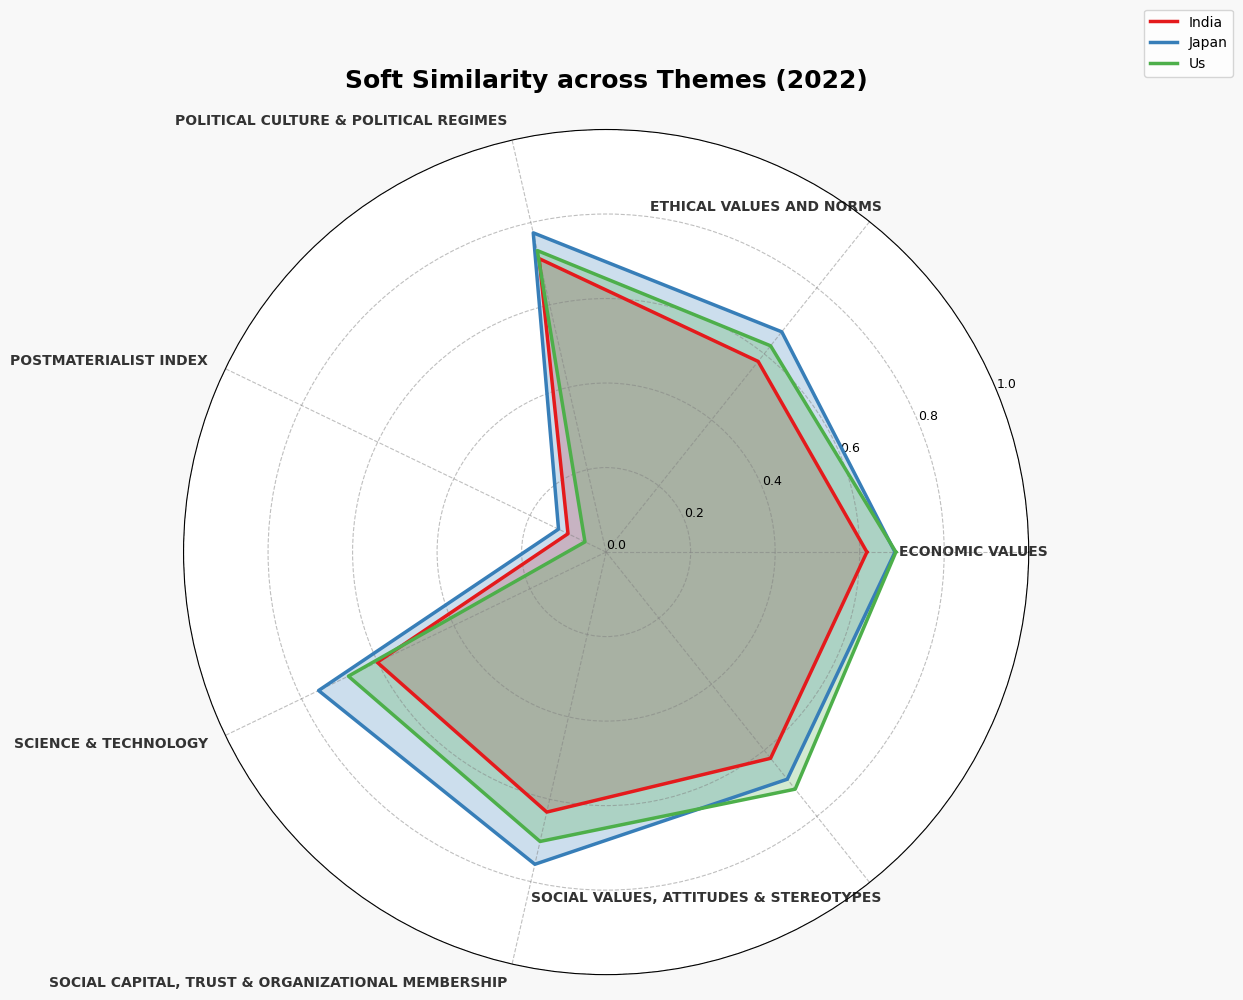

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

countries = ['india', 'japan', 'US']
all_theme_scores = {}

# Collect per-theme scores for all countries
for country in countries:
    results = compute_similarity_per_theme(country=country, mode='country')
    theme_results = {theme: score for theme, score in results['per_theme'].items() 
                     if score is not np.nan and results['per_theme_counts'][theme] > 1}
    all_theme_scores[country] = theme_results

# Keep only themes that are valid (non-NaN) in ALL countries
common_themes = sorted(
    set.intersection(*(set(scores.keys()) for scores in all_theme_scores.values()))
)

# Prepare angles for radar chart
num_vars = len(common_themes)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # close the loop

# Initialize polar subplot
fig, ax = plt.subplots(figsize=(12, 10), subplot_kw=dict(polar=True))
fig.patch.set_facecolor('#f8f8f8')  # light background

# Use a high-contrast color palette (Set1)
palette = sns.color_palette("Set1", n_colors=len(countries))

# Plot each country
for idx, (country, scores) in enumerate(all_theme_scores.items()):
    values = [scores.get(theme, 0) for theme in common_themes]
    values += values[:1]
    color = palette[idx]
    ax.plot(angles, values, linewidth=2.5, color=color, label=country.capitalize())
    ax.fill(angles, values, color=color, alpha=0.25)

# Set theme labels around the circle
ax.set_xticks(angles[:-1])
ax.set_xticklabels(common_themes, fontsize=10, fontweight='bold', color='#333333')

# Rotate labels slightly for readability
for label, angle in zip(ax.get_xticklabels(), angles):
    label.set_rotation(np.degrees(angle))
    label.set_horizontalalignment('right')

# Set y-labels and range
ax.set_yticks(np.linspace(0, 1, 6))
ax.set_yticklabels([f"{x:.1f}" for x in np.linspace(0, 1, 6)], fontsize=9)
ax.set_ylim(0, 1)

# Grid style
ax.yaxis.grid(True, color='gray', linestyle='dashed', alpha=0.5)
ax.xaxis.grid(True, color='gray', linestyle='dashed', alpha=0.5)

# Title and legend
plt.title("Soft Similarity across Themes (2022)", size=18, pad=30, weight='bold')
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1.15), fontsize=10, frameon=True)

plt.tight_layout()
plt.show()

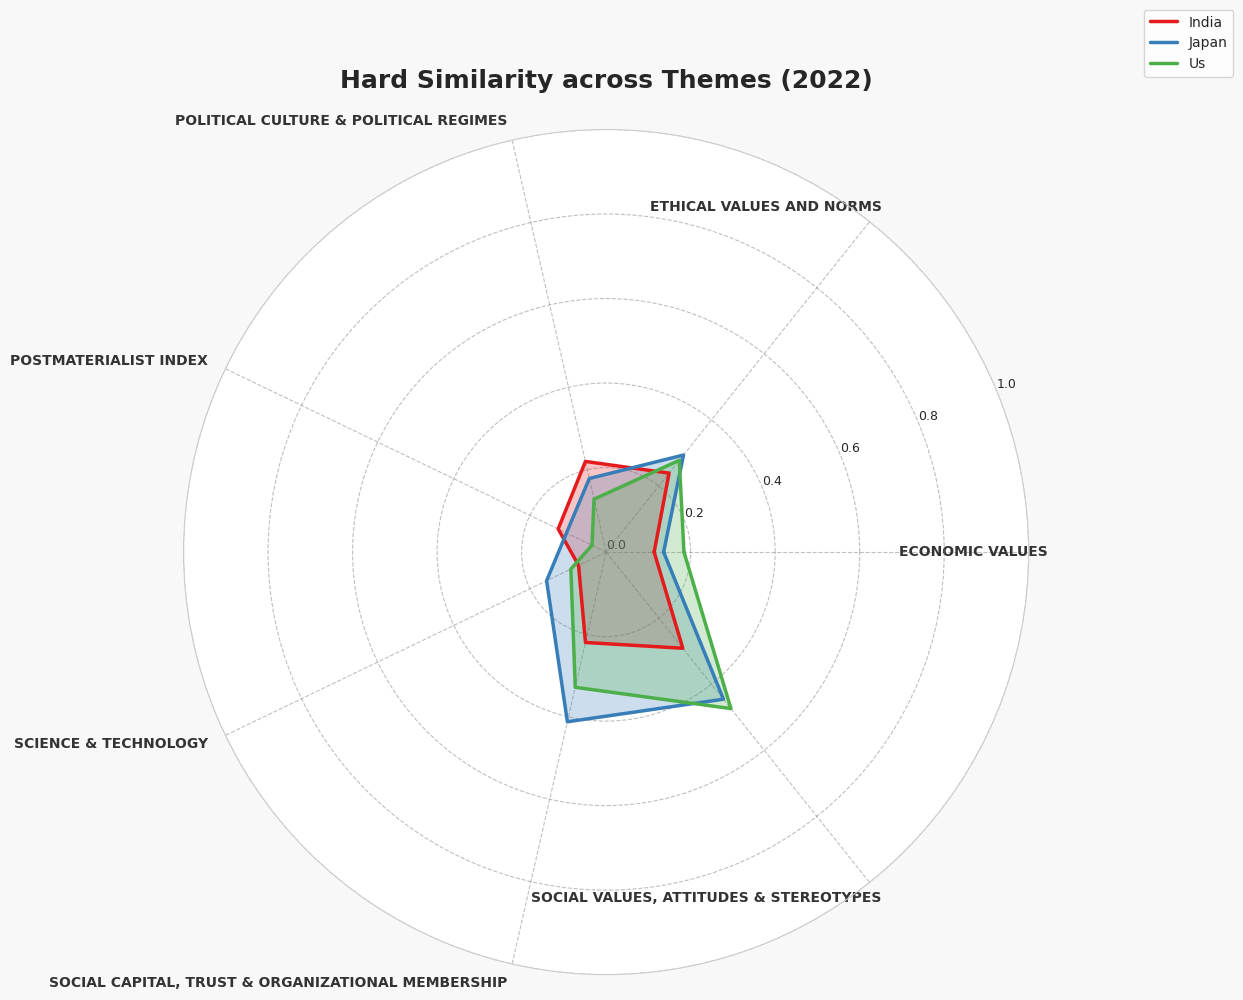

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

countries = ['india', 'japan', 'US']
all_theme_scores = {}

# Collect per-theme scores for all countries
for country in countries:
    results = compute_similarity_per_theme(country=country, mode='country', metric_type='hard')
    theme_results = {theme: score for theme, score in results['per_theme'].items() 
                     if score is not np.nan and results['per_theme_counts'][theme] > 1}
    all_theme_scores[country] = theme_results

# Keep only themes that are valid (non-NaN) in ALL countries
common_themes = sorted(
    set.intersection(*(set(scores.keys()) for scores in all_theme_scores.values()))
)

# Prepare angles for radar chart
num_vars = len(common_themes)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1] 

# Initialize polar subplot
fig, ax = plt.subplots(figsize=(12, 10), subplot_kw=dict(polar=True))
fig.patch.set_facecolor('#f8f8f8')

# Use a high-contrast color palette (Set1)
palette = sns.color_palette("Set1", n_colors=len(countries))

# Plot each country
for idx, (country, scores) in enumerate(all_theme_scores.items()):
    values = [scores.get(theme, 0) for theme in common_themes]
    values += values[:1]
    color = palette[idx]
    ax.plot(angles, values, linewidth=2.5, color=color, label=country.capitalize())
    ax.fill(angles, values, color=color, alpha=0.25)

# Set theme labels around the circle
ax.set_xticks(angles[:-1])
ax.set_xticklabels(common_themes, fontsize=10, fontweight='bold', color='#333333')

# Rotate labels slightly for readability
for label, angle in zip(ax.get_xticklabels(), angles):
    label.set_rotation(np.degrees(angle))
    label.set_horizontalalignment('right')

# Set y-labels and range
ax.set_yticks(np.linspace(0, 1, 6))
ax.set_yticklabels([f"{x:.1f}" for x in np.linspace(0, 1, 6)], fontsize=9)
ax.set_ylim(0, 1)

# Grid style
ax.yaxis.grid(True, color='gray', linestyle='dashed', alpha=0.5)
ax.xaxis.grid(True, color='gray', linestyle='dashed', alpha=0.5)

# Title and legend
plt.title("Hard Similarity across Themes (2022)", size=18, pad=30, weight='bold')
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1.15), fontsize=10, frameon=True)

plt.tight_layout()
plt.show()